In [1]:
# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulacao de dados
import pandas as pd
import numpy as np

# Import para visualizacao dos dados
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Imports de bibliotecas para treinamento de redes neurais
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.2.0


In [2]:
#dados
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


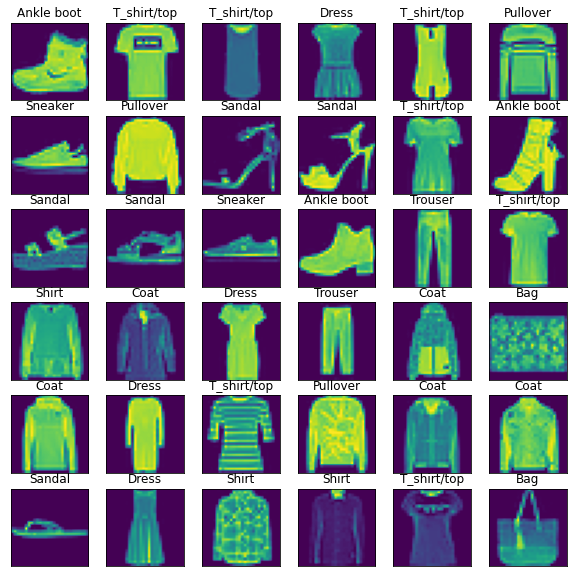

In [4]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

In [5]:
batch_size = 32
epochs     = 10

In [6]:
x_train = train_images / 255.0
x_test  = test_images / 255.0

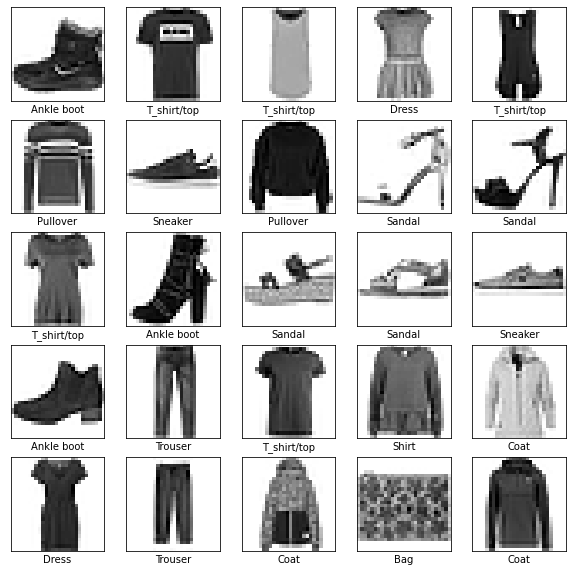

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [11]:
model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

In [13]:
model.fit(train_images,
          train_labels,
          batch_size = batch_size,
          epochs     = epochs,
          verbose    = 2)

Epoch 1/10
1875/1875 - 7s - loss: 3.0988 - accuracy: 0.7092
Epoch 2/10
1875/1875 - 9s - loss: 0.6737 - accuracy: 0.7688
Epoch 3/10
1875/1875 - 7s - loss: 0.5739 - accuracy: 0.8049
Epoch 4/10
1875/1875 - 7s - loss: 0.5516 - accuracy: 0.8146
Epoch 5/10
1875/1875 - 12s - loss: 0.5318 - accuracy: 0.8225
Epoch 6/10
1875/1875 - 14s - loss: 0.5196 - accuracy: 0.8279
Epoch 7/10
1875/1875 - 5s - loss: 0.5057 - accuracy: 0.8317
Epoch 8/10
1875/1875 - 8s - loss: 0.5022 - accuracy: 0.8341
Epoch 9/10
1875/1875 - 8s - loss: 0.4945 - accuracy: 0.8363
Epoch 10/10
1875/1875 - 11s - loss: 0.4946 - accuracy: 0.8366


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy: ', test_acc)

313/313 - 1s - loss: 0.5586 - accuracy: 0.8162

Test accuracy:  0.8162000179290771


In [15]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([3.7437501e-12, 2.3021121e-15, 0.0000000e+00, 1.5038817e-11,
       5.4672251e-23, 2.6044253e-02, 7.6401484e-20, 8.7785814e-03,
       5.9418612e-09, 9.6517724e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))
               
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
               
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

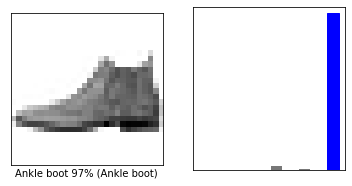

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()


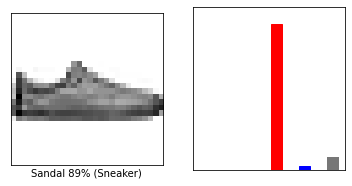

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

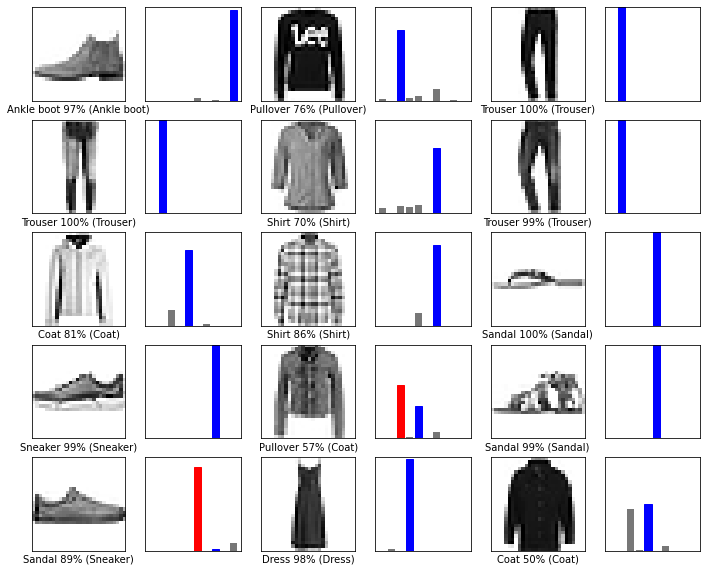

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    
plt.show()

In [22]:
img = test_images[0]

print(img.shape)

(28, 28)


In [23]:
img = (np.expand_dims(img,0))
print(img.shape)



(1, 28, 28)


In [24]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.7438073e-12 2.3021824e-15 0.0000000e+00 1.5039131e-11 5.4673703e-23
  2.6044253e-02 7.6404398e-20 8.7786140e-03 5.9419292e-09 9.6517724e-01]]


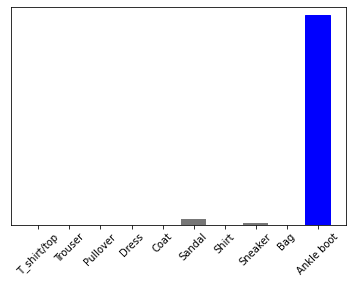

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

9